In [1]:
from models import Deconvolution_2D
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import convolution_matrix

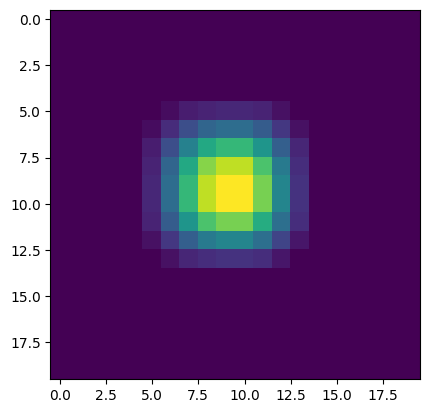

In [12]:
def create_circle_image(size, radius):
    img = np.zeros((size, size))
    y, x = np.ogrid[-size//2:size//2, -size//2:size//2]
    mask = (x**2 + y**2 <= radius**2) #& ( x**2 + y**2 >= (radius/2)**2)
    img[mask] = 1
    return img
 

n=20
radius = 0.1  # Radius of the circle

x_input = np.linspace(0, 1, n).reshape(n, 1)
y_input = np.linspace(0, 1, n).reshape(n, 1)
x_coord, y_coord = np.meshgrid(x_input, y_input)

center_x, center_y = 0.5, 0.5
distance_from_center = np.sqrt((x_coord - center_x) ** 2 + (y_coord - center_y) ** 2)
circle_image = np.where(distance_from_center <= radius, 1., 0.)

PSF_size = 6
PSF_param = 3.
BC = 'wrap'
deconv = Deconvolution_2D(PSF_size, PSF_param, BC)
image = create_circle_image(n, 3)

true = image
temp = deconv.forward(circle_image)

y_data = temp #+ np.random.normal(0, sigma_noise, temp.shape)

plt.figure()
plt.imshow(y_data)

In [22]:
import torch
t = torch.tensor(np.concatenate((x_coord.reshape(1, -1), y_coord.reshape(1, -1)), axis=0), dtype=torch.float32).T

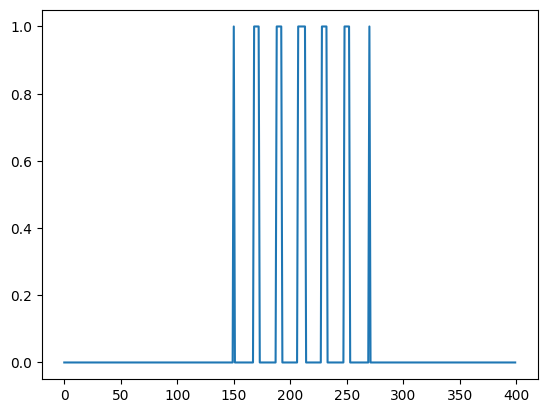

In [23]:
plt.plot(true.flatten())

In [24]:
t.shape

torch.Size([400, 2])

In [25]:

# The BNN output (placeholder) - assume you have it in a PyTorch tensor with shape (800, 1)
W1 = torch.randn(800, 2)  # Replace this with actual BNN output
b1 = torch.randn(1, 800)  # Replace this with actual BNN output
t = t@W1.T + b1
t.shape

torch.Size([400, 800])

In [26]:
W2 = torch.randn(100, 800)  # Replace this with actual BNN output
b2 = torch.randn(1, 100)  # Replace this with actual BNN output
t = torch.tanh(t@W2.T + b2)
t.shape

torch.Size([400, 1])

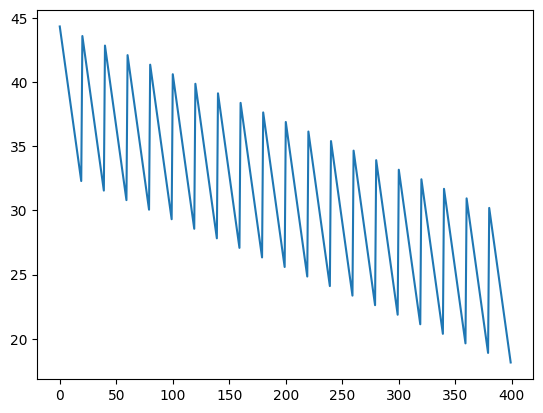

In [27]:
plt.plot(t)

In [ ]:
W3 = torch.randn(1, 100)  # Replace this with actual BNN output
b3 = torch.randn(1, 1)  # Replace this with actual BNN output
t = t@W3.T + b3
t.shape